# Image Classification

## Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile

## Cat & Dog Image Classification Using CNNs & TensorFlow

### Import Data

In [8]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Extract Data and Build Directory Structure

In [9]:
local_zip = "cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('cats_and_dogs_filtered')
zip_ref.close()


In [10]:
base_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [11]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [12]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

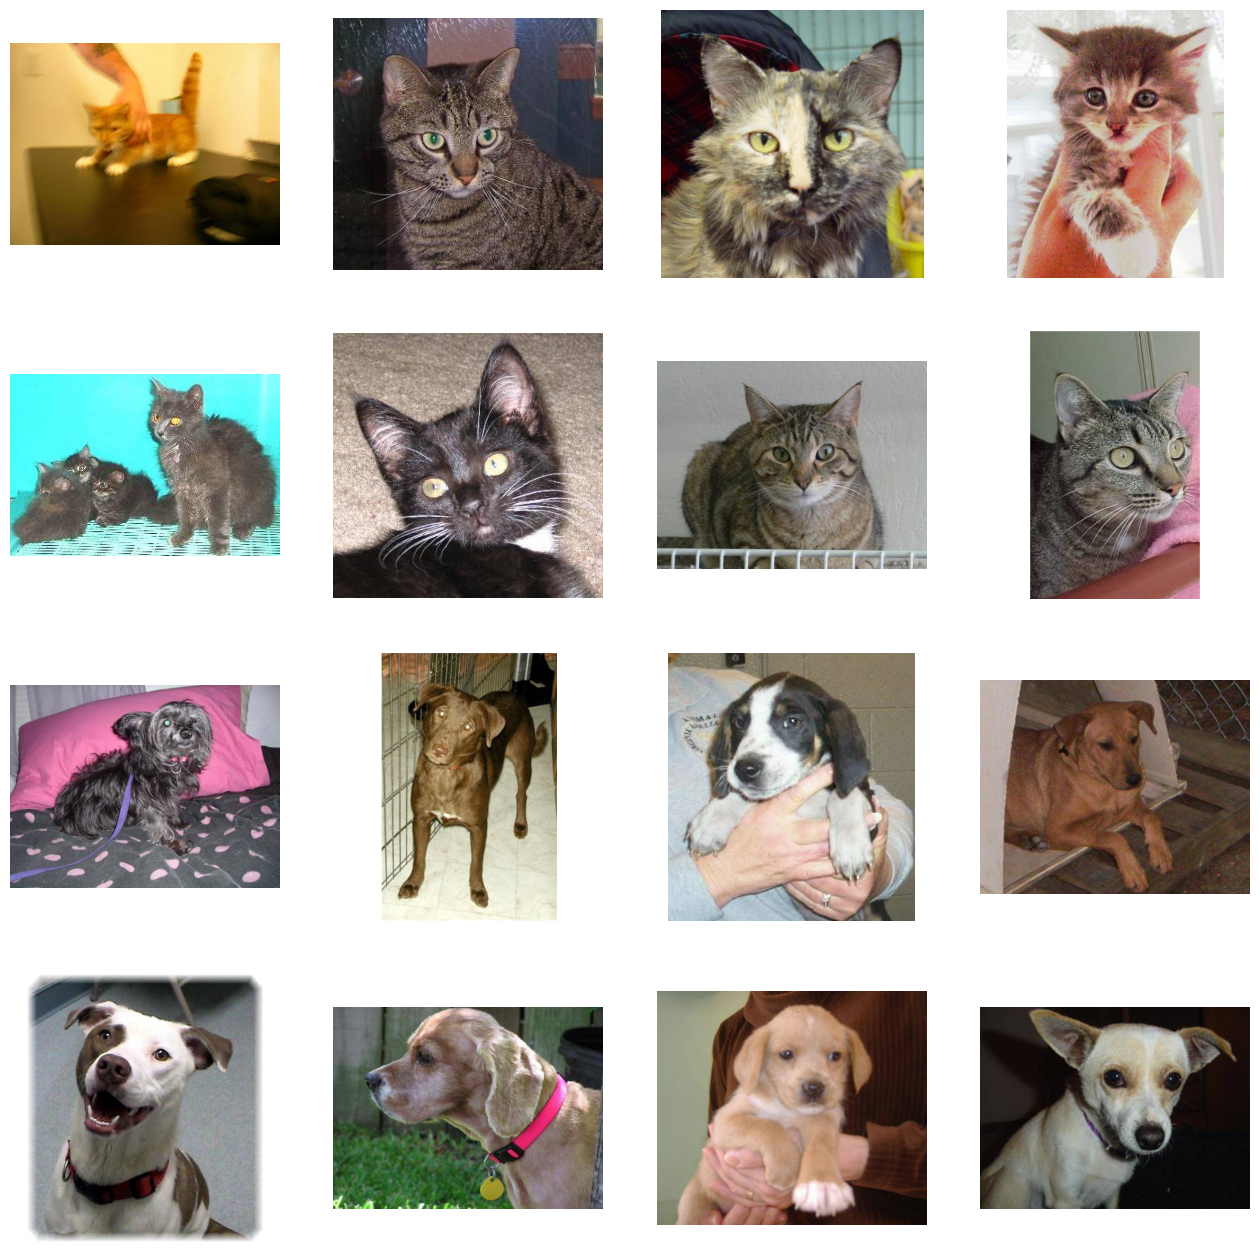

In [13]:
nrows= 4
ncols = 4
pic_index =0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index=8
next_cat = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,  img_path in enumerate(next_cat+next_dog):
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis("Off")
  img =mpimg.imread(img_path)
  plt.imshow(img)


### Build CNN Model Using Keras Layers Objects

#### Build CNN Architecture

In [14]:
import tensorflow as tf
import tensorflow.keras as keras

In [15]:
img_input = keras.layers.Input(shape=(150,150,3))

#Embedding Layers
L = keras.layers.Conv2D(16,3, activation='relu')(img_input)
L = keras.layers.MaxPooling2D(2)(L)

L = keras.layers.Conv2D(32,3, activation='relu')(L)
L = keras.layers.MaxPooling2D(2)(L)

L = keras.layers.Conv2D(64,3, activation='relu')(L)
L = keras.layers.MaxPooling2D(2)(L)

#Fully Connected Layer
F = keras.layers.Flatten()(L)
##Classifier
F = keras.layers.Dense(512, activation='relu')(F)
output = keras.layers.Dense(1, activation='sigmoid')(F)

In [16]:
my_cnn_model = keras.Model(img_input,output)

In [17]:
my_cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

#### Train CNN

In [18]:
from keras.optimizers import RMSprop

##### Model Compile



In [19]:
my_cnn_model.compile(loss='binary_crossentropy',
                     optimizer=RMSprop(learning_rate=.001),
                     metrics=['acc'])

##### Preprocess Image Data

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
#Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

#Fetch Data and Resize
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size =(150,150),
                                                    batch_size  =20,
                                                    class_mode  ='binary')
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size =(150,150),
                                                        batch_size  =20,
                                                        class_mode  ='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##### Model Fit

In [22]:
history = my_cnn_model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs=15,
                           validation_data=validation_generator,
                           verbose=2)

c:\Users\Rami Alrwais\Desktop\training\tf-env311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 - 62s - 616ms/step - acc: 0.5360 - loss: 0.8338 - val_acc: 0.5860 - val_loss: 0.6711
Epoch 2/15
100/100 - 12s - 120ms/step - acc: 0.6115 - loss: 0.6660 - val_acc: 0.6480 - val_loss: 0.6117
Epoch 3/15
100/100 - 12s - 122ms/step - acc: 0.6715 - loss: 0.5998 - val_acc: 0.6610 - val_loss: 0.6268
Epoch 4/15
100/100 - 12s - 122ms/step - acc: 0.7250 - loss: 0.5443 - val_acc: 0.7260 - val_loss: 0.5481
Epoch 5/15
100/100 - 12s - 122ms/step - acc: 0.7550 - loss: 0.4934 - val_acc: 0.6830 - val_loss: 0.6116
Epoch 6/15
100/100 - 13s - 128ms/step - acc: 0.8055 - loss: 0.4182 - val_acc: 0.7030 - val_loss: 0.6031
Epoch 7/15
100/100 - 13s - 127ms/step - acc: 0.8195 - loss: 0.3692 - val_acc: 0.7480 - val_loss: 0.5444
Epoch 8/15
100/100 - 12s - 124ms/step - acc: 0.8580 - loss: 0.3122 - val_acc: 0.7120 - val_loss: 0.6393
Epoch 9/15
100/100 - 12s - 123ms/step - acc: 0.9160 - loss: 0.2130 - val_acc: 0.7160 - val_loss: 0.7171
Epoch 10/15
100/100 - 12s - 116ms/step - acc: 0.9410 - loss: 0.1

#### Feature Mapping

In [23]:
model = my_cnn_model

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_29524\1221499103.py:39: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_29524\1221499103.py:42: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


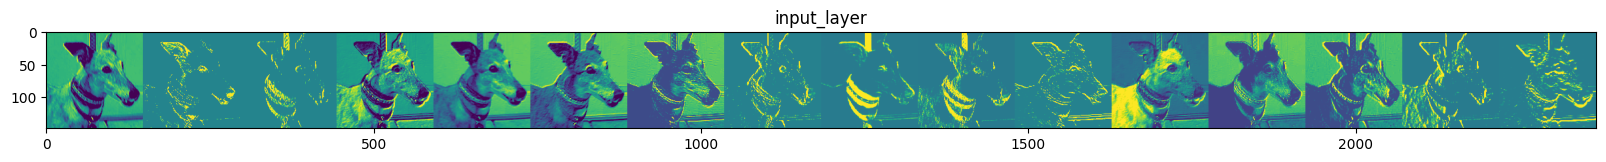

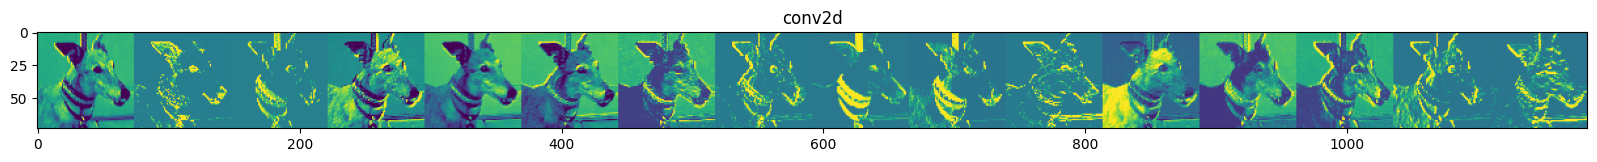

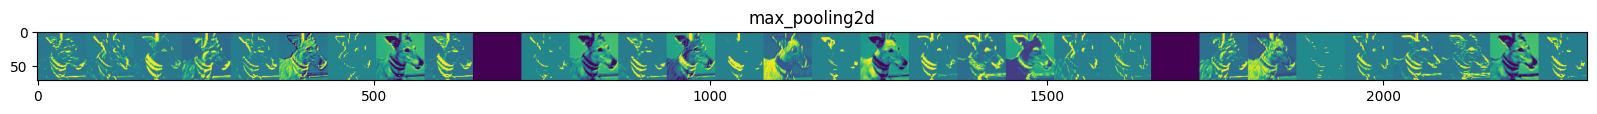

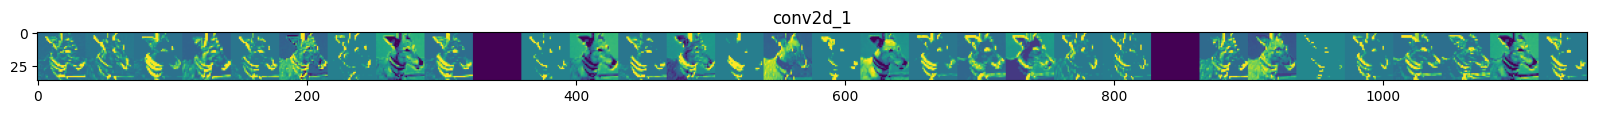

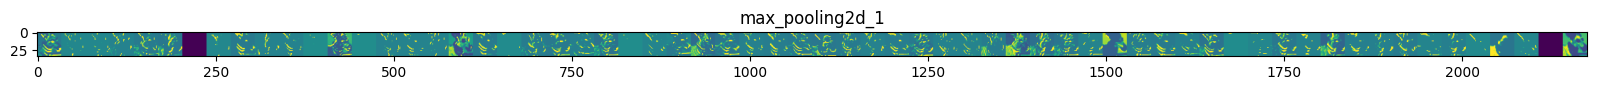

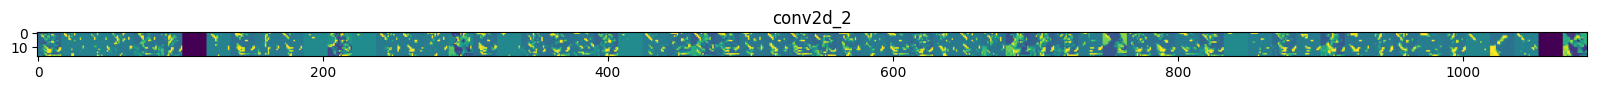

In [25]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Improved Model